# Data Preparation



We import all the required libraries.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Dataset

The dataset used has 372450 images of alphabets of 28×28 pixels, as a CSV file: https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format. The CSV file is in the same folder as the Jupyter Notebook.

# Read the data

We read the csv file into a dataframe.

In [2]:
file = 'project_dataset.csv'
data = pd.read_csv(file)

data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting data into their images and their labels

We need to split the data into images and their respective labels.
The ‘0’ column contains the labels, so we drop it from the data dataframe and use it separately as y to form the labels.



In [3]:
x = data.drop('0',axis = 1)
y = data['0']

display(x.head(5))
display(y)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

# Splitting and Reshaping data

*   Then we split the data into training & testing dataset using train_test_split().
*   We reshape the data into the orignal 28x28 pixels image, as the CSV file contains the data for the values of pixels in 784 columns.



In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


# Putting integers as labels for each alphabet

All the labels are present in the form of floating point values, that we convert to integer values. So we create a dictionary to map the integer values with the characters.

In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',
             11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
             20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

# Showing the image count of each alphabet

Here we are only describing the distribution of the alphabets.
Firstly, we convert the labels into integer values and append them into the count list according to the label. This count list has the number of images present in the dataset belonging to each alphabet.
Now we create a list of alphabets containing all the characters using the values() function of the dictionary. Using the count & alphabets lists we draw the horizontal bar plot.

{'A': 13869,
 'B': 8668,
 'C': 23409,
 'D': 10134,
 'E': 11440,
 'F': 1163,
 'G': 5762,
 'H': 7218,
 'I': 1120,
 'J': 8493,
 'K': 5603,
 'L': 11586,
 'M': 12336,
 'N': 19010,
 'O': 57825,
 'P': 19341,
 'Q': 5812,
 'R': 11566,
 'S': 48419,
 'T': 22495,
 'U': 29008,
 'V': 4182,
 'W': 10784,
 'X': 6272,
 'Y': 10859,
 'Z': 6076}

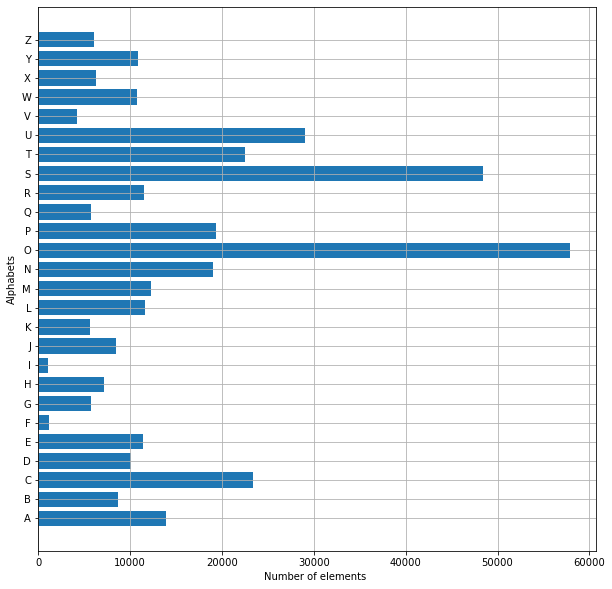

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')

for i in y_int:
    count[i] +=1

alphabets = []

for i in word_dict.values():
    alphabets.append(i)

total_count = {alphabets[i]: count[i] for i in range(len(alphabets))}

display(total_count)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

# Randomly plotting 9 images as an example for the data

Now we shuffle some of the images of the train set. The shuffling is done using the shuffle() function so that we can display some random images. We then create 9 plots in 3×3 shape & display the thresholded images of 9 alphabets.

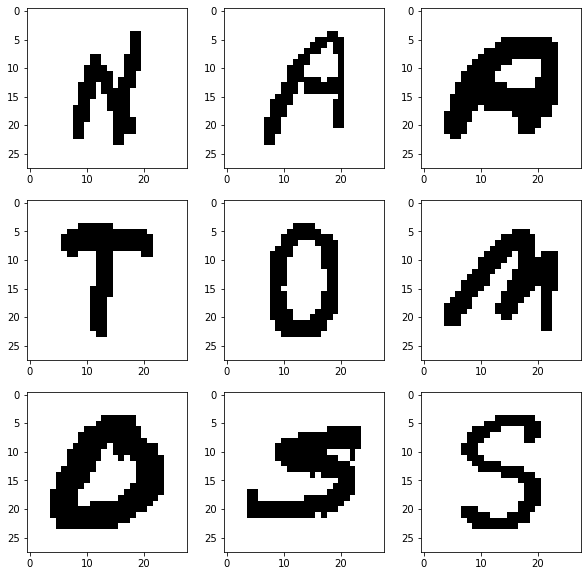

In [7]:
shuff = shuffle(train_x[:100])
shuff = shuff.astype(np.uint8)

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    a, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shu, (28,28)), cmap="Greys")

plt.show()

# Reshaping the data



Now we reshape the train & test image dataset so that they can be put in the model.

In [21]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

train_y_cat = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_y_cat.shape)

test_y_cat = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_y_cat.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)
New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# Model Designing

CNN stands for Convolutional Neural Networks that are used to extract the features of the images using several layers of filters.
The convolution layers are generally followed by maxpool layers that are used to reduce the number of features extracted and ultimately the output of the maxpool and layers and convolution layers are flattened into a vector of single dimension and are given as an input to the Dense layer (The fully connected network).

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

# Model Compilation and Fitting

* Here we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.
* The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
* The dataset is very large so we are training for only a single epoch.
* Then we get the model summary that tells us what were the different layers defined in the model & also we save the model.

In [11]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_y_cat, epochs=20, batch_size = 500, validation_data = (test_X,test_y_cat), verbose = 2)

Epoch 1/20
596/596 - 178s - loss: 0.4735 - accuracy: 0.8963 - val_loss: 0.0869 - val_accuracy: 0.9762
Epoch 2/20
596/596 - 160s - loss: 0.0708 - accuracy: 0.9798 - val_loss: 0.0692 - val_accuracy: 0.9805
Epoch 3/20
596/596 - 168s - loss: 0.0510 - accuracy: 0.9853 - val_loss: 0.0582 - val_accuracy: 0.9837
Epoch 4/20
596/596 - 177s - loss: 0.0404 - accuracy: 0.9884 - val_loss: 0.0491 - val_accuracy: 0.9864
Epoch 5/20
596/596 - 171s - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0503 - val_accuracy: 0.9862
Epoch 6/20
596/596 - 169s - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0408 - val_accuracy: 0.9893
Epoch 7/20
596/596 - 172s - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0582 - val_accuracy: 0.9846
Epoch 8/20
596/596 - 170s - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 9/20
596/596 - 171s - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0395 - val_accuracy: 0.9897
Epoch 10/20
596/596 - 166s - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0347 - 

In [12]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

We print out the training & validation accuracies along with the training & validation losses for character recognition.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


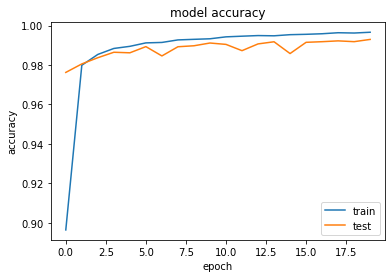

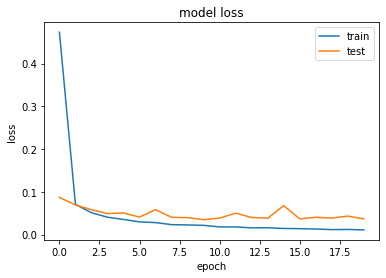

In [19]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Testing the model

We create 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions that are made using the model.predict() function.

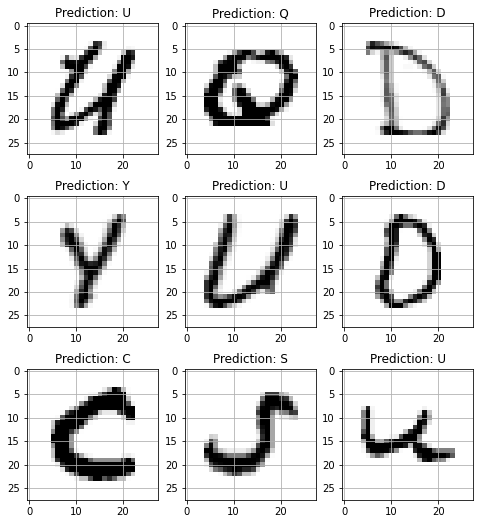

In [14]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_y_cat[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

# Predicting using an external image

We read an external image that is originally an image of the alphabet ‘B’ and make a copy of it to process and feed into the model for the prediction.
The img read is then converted from BGR representation (as OpenCV reads the image in BGR format) to RGB for displaying the image, and is resized to our required dimensions.

In [2]:
file2 = 'char.jpg'
img = cv2.imread(file2)
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

Now we do some processing on the copied image (img_copy). We convert the image from BGR to grayscale and apply thresholding to it to keep the image smooth without any sort of hazy gray colors in the image that could lead to wrong predictions.
The image is to be then resized using cv2.resize() function into the dimensions that the model takes as input, along with reshaping the image using np.reshape() so that it can be used as model input.

In [3]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

We make a prediction using the processed image & use the np.argmax() function to get the index of the class with the highest predicted probability. Using this we get to know the exact character through the word_dict dictionary.

In [4]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',
             11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
             20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

model1 = keras.models.load_model("model_hand.h5")

img_pred = word_dict[np.argmax(model1.predict(img_final))]

cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('test',img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()